# ABCDEats Inc.
## Data Mining - 2024/2025 - Group 22
Bruna Duarte m20210669 <br>
Catarina Silva 20240558

### Import Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import os, sys
#hide the warnings

sys.stderr = open(os.devnull, "w")  # silence stderr
from sklearn.ensemble import RandomForestRegressor
sys.stderr = sys.__stderr__  # unsilence stderr


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import ceil
import numpy as np
import pandas as pd
import csv
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression, LinearRegression, LassoCV
from sklearn.feature_selection import RFE, mutual_info_classif, mutual_info_regression
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import median_absolute_error, mutual_info_score
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.base import clone

from sklearn.metrics import pairwise_distances

from sklearn.datasets import fetch_openml
from sklearn.utils import resample


%matplotlib inline
# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Seeting seaborn style
sns.set(rc={'figure.figsize':(11.7,8.27)})


# Metadata
- *customer_id* - Unique identifier for each customer.
- *customer_region* - geographic region where the customer is located.
- *customer_age* - Age of the customer.
- *vendor_count* - Number of unique vendors the customer has ordered from.
- *product_count* - Total number of products the customer has ordered.
- *is_chain* - Indicates whether the customer’s order was from a chain restaurant.
- *first_order* - Number of days from the start of the dataset when the customer first placed an order.
- *last_order* - Number of days from the start of the dataset when the customer most recently placed an order.
- *last_promo* - The category of the promotion or discount most recently used by the customer.
- *payment_method* - Method most recently used by the customer to pay for their orders.
- *CUI_American*, *CUI_Asian*, *CUI_Chinese*, *CUI_Italian*, etc. - The amount in monetary units spent by the customer from the indicated type of cuisine.
- *DOW_0* to *DOW_6* - Number of orders placed on each day of the week (0 = Sunday, 6 = Saturday).
- *HR_0* to *HR_23* - Number of orders placed during each hour of the day (0 = midnight, 23 = 11 PM).

## Import Dataset

In [2]:
df = pd.read_csv('DM2425_ABCDEats_DATASET.csv')
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0


During our Exploratory Data Analysis (EDA), we must also account for:
* Coherence check
* Outliers
* Missing values
* Feature Engineering

Depending on the context, various steps must be considered when performing Data Preprocessing.
The most relevant steps are the following:
* Coherence check (find inconsistent values, missing values, outliers and any other problem you may find in your dataset)
* Data editing (fix inconsistent values)
* Data cleansing (drop observations - Outlier removal and removal of inconsistent values and/or features)
* Data wrangling (feature extraction/engineering and transformation)
* Data reduction (reducing the dimensionality of a dataset, producing summary statistics, reducing the number of records in a dataset)

## Data Exploration

In [3]:
df.set_index('customer_id',inplace=True)
df

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,...,0,0,0,0,2,0,0,0,0,0
5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,...,0,0,0,0,0,0,0,0,0,0
f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,...,0,0,0,0,0,0,0,0,0,0
180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,...,1,0,0,0,0,0,0,0,0,0
4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f4e366c281,8670,30.0,1,1,1,NaN,0,FREEBIE,DIGI,0.00,...,0,0,0,0,0,0,0,0,0,0
f6b6709018,8670,NaN,1,1,0,NaN,0,DELIVERY,DIGI,18.04,...,0,0,1,0,0,0,0,0,0,0
f74ad8ce3f,8670,24.0,1,1,1,NaN,0,-,DIGI,0.00,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(31888, 55)

In [5]:
df.columns

Index(['customer_region', 'customer_age', 'vendor_count', 'product_count',
       'is_chain', 'first_order', 'last_order', 'last_promo', 'payment_method',
       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1',
       'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2',
       'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10',
       'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18',
       'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31888 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_region           31888 non-null  object 
 1   customer_age              31161 non-null  float64
 2   vendor_count              31888 non-null  int64  
 3   product_count             31888 non-null  int64  
 4   is_chain                  31888 non-null  int64  
 5   first_order               31782 non-null  float64
 6   last_order                31888 non-null  int64  
 7   last_promo                31888 non-null  object 
 8   payment_method            31888 non-null  object 
 9   CUI_American              31888 non-null  float64
 10  CUI_Asian                 31888 non-null  float64
 11  CUI_Beverages             31888 non-null  float64
 12  CUI_Cafe                  31888 non-null  float64
 13  CUI_Chicken Dishes        31888 non-null  float64
 1

Some columns like customer_age, first_order, and HR_0 contain missing values.

### Options for handling:
* For **customer_age**, imputation can be based on the mean or median age of customers.
* For **first_order**, imputing missing values with the median.
* For **HR_0** (missing hours), it could be treated similarly.

In [7]:
# Impute missing values for customer_age and first_order
df['customer_age'].fillna(df['customer_age'].median(), inplace=True)
df['first_order'].fillna(df['first_order'].median(), inplace=True)

# Fill missing HR_0 with 0
df['HR_0'].fillna(0, inplace=True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31888 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_region           31888 non-null  object 
 1   customer_age              31888 non-null  float64
 2   vendor_count              31888 non-null  int64  
 3   product_count             31888 non-null  int64  
 4   is_chain                  31888 non-null  int64  
 5   first_order               31888 non-null  float64
 6   last_order                31888 non-null  int64  
 7   last_promo                31888 non-null  object 
 8   payment_method            31888 non-null  object 
 9   CUI_American              31888 non-null  float64
 10  CUI_Asian                 31888 non-null  float64
 11  CUI_Beverages             31888 non-null  float64
 12  CUI_Cafe                  31888 non-null  float64
 13  CUI_Chicken Dishes        31888 non-null  float64
 1

### Descriptive statistics
* Numerical Columns, can be studied using descriptive stats:

In [9]:
df[['customer_age', 'vendor_count', 'product_count', 'first_order', 'last_order']].describe()


,customer_age,vendor_count,product_count,first_order,last_order
count,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000
mean,27.472153,3.102609,5.668245,28.457068,63.675521
std,7.082367,2.771587,6.957287,24.071869,23.226123
min,15.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,2.000000,7.000000,49.000000
50%,26.000000,2.000000,3.000000,22.000000,70.000000
75%,31.000000,4.000000,7.000000,45.000000,83.000000
max,80.000000,41.000000,269.000000,90.000000,90.000000


In [10]:
df.describe(include = "object")

,customer_region,last_promo,payment_method
count,31888,31888,31888
unique,9,4,3
top,8670,-,CARD
freq,9761,16748,20161


* Categorical columns, can be analyzed using frequency counts:

In [11]:
df['customer_region'].value_counts()

8670    9761
4660    9550
2360    8829
2440    1483
4140     857
8370     495
2490     445
-        442
8550      26
Name: customer_region, dtype: int64

In [12]:
df['last_promo'].value_counts()

-           16748
DELIVERY     6286
DISCOUNT     4496
FREEBIE      4358
Name: last_promo, dtype: int64

In [13]:
df['payment_method'].value_counts()

CARD    20161
DIGI     6101
CASH     5626
Name: payment_method, dtype: int64

In [14]:
df.duplicated().sum()

60

In [15]:
df.drop_duplicates(inplace=True)
df

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,...,0,0,0,0,2,0,0,0,0,0
5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,...,0,0,0,0,0,0,0,0,0,0
f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,...,0,0,0,0,0,0,0,0,0,0
180c632ed8,4660,26.0,2,3,1,0.0,2,DELIVERY,DIGI,0.00,...,1,0,0,0,0,0,0,0,0,0
4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f4e366c281,8670,30.0,1,1,1,22.0,0,FREEBIE,DIGI,0.00,...,0,0,0,0,0,0,0,0,0,0
f6b6709018,8670,26.0,1,1,0,22.0,0,DELIVERY,DIGI,18.04,...,0,0,1,0,0,0,0,0,0,0
f74ad8ce3f,8670,24.0,1,1,1,22.0,0,-,DIGI,0.00,...,0,0,0,0,0,0,0,0,0,0


### New features

In [16]:
#(CATARINA)
# 1. Total Spend = Sum of all CUI_* columns
cuisine_columns = [col for col in df.columns if col.startswith('CUI_')]
df['Total_Spend'] = df[cuisine_columns].sum(axis=1)

# 2. Average Spend per Vendor = Total Spend / vendor_count
df['Avg_Spend_per_Vendor'] = df['Total_Spend'] / df['vendor_count']

# 3. Spend per Product = Total Spend / product_count
df['Spend_per_Product'] = df['Total_Spend'] / df['product_count']

# 4. Days Since Last Order = Current day - last_order
current_day = df['last_order'].max()
df['Days_Since_Last_Order'] = current_day - df['last_order']

# 5. Cuisine Diversity = Number of non-zero CUI_* columns
df['Cuisine_Diversity'] = df[cuisine_columns].gt(0).sum(axis=1)


df

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,HR_19,HR_20,HR_21,HR_22,HR_23,Total_Spend,Avg_Spend_per_Vendor,Spend_per_Product,Days_Since_Last_Order,Cuisine_Diversity
customer_id,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,...,0,0,0,0,0,28.88,14.440,5.776,89,1
5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,...,0,0,0,0,0,19.21,9.605,9.605,89,2
f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,...,0,0,0,0,0,9.20,9.200,4.600,89,1
180c632ed8,4660,26.0,2,3,1,0.0,2,DELIVERY,DIGI,0.00,...,0,0,0,0,0,31.56,15.780,10.520,88,2
4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,...,0,0,0,0,0,55.44,27.720,11.088,88,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f4e366c281,8670,30.0,1,1,1,22.0,0,FREEBIE,DIGI,0.00,...,0,0,0,0,0,18.04,18.040,18.040,90,1
f6b6709018,8670,26.0,1,1,0,22.0,0,DELIVERY,DIGI,18.04,...,0,0,0,0,0,18.04,18.040,18.040,90,1
f74ad8ce3f,8670,24.0,1,1,1,22.0,0,-,DIGI,0.00,...,0,0,0,0,0,17.79,17.790,17.790,90,1


# Visual Exploration

In [21]:
non_metric_features = ["customer_region", "last_promo", "payment_method"] #nominal
metric_features = df.columns.drop(non_metric_features).to_list() #numeric

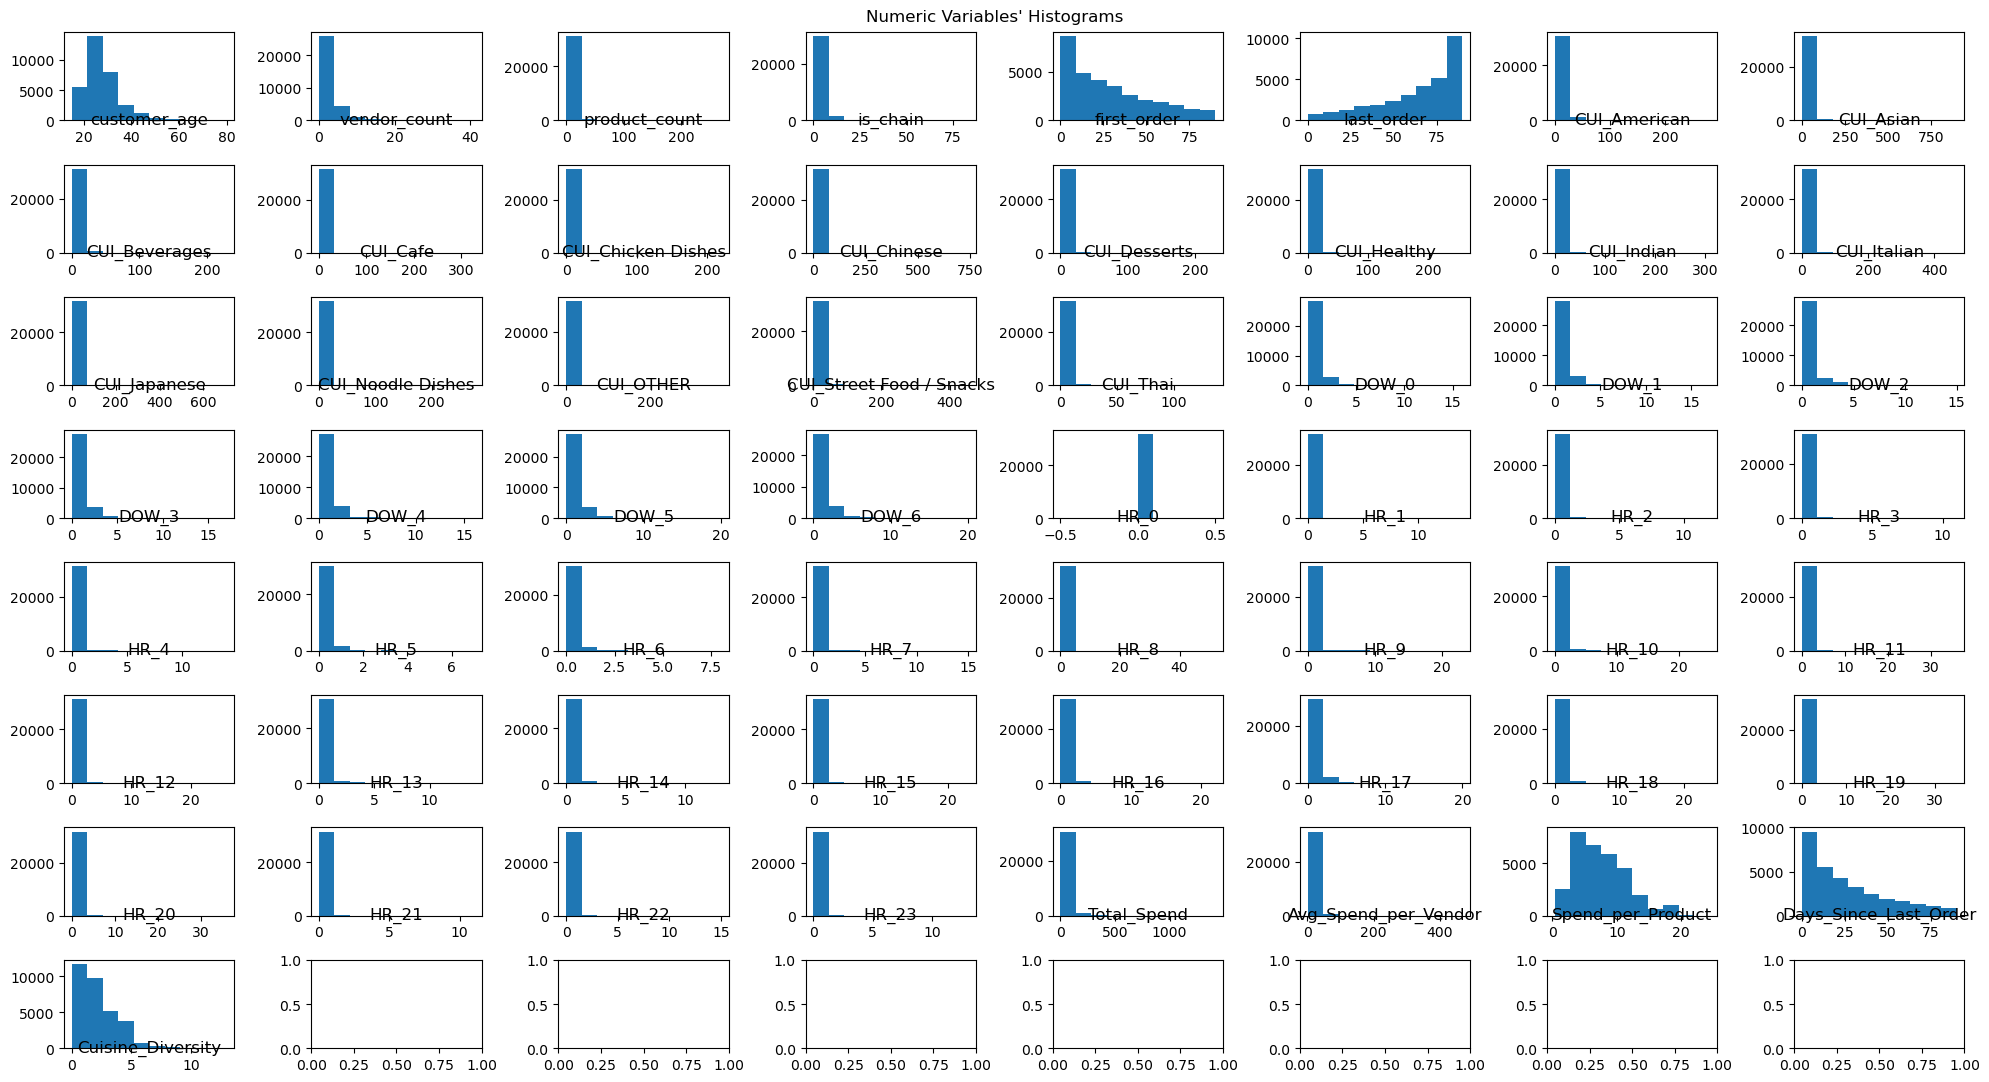

In [26]:
# Prepare the figure and create a grid of subplots
fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11), tight_layout=True)

# Iterate through the axes and the feature names to plot histograms
for ax, feat in zip(axes.flatten(), metric_features):
    # Clean the data by replacing infinite values with NaN and dropping NaNs
    cleaned_data = df[feat].replace([np.inf, -np.inf], np.nan).dropna()
    
    # Only plot the histogram if there is data available
    if len(cleaned_data) > 0:
        ax.hist(cleaned_data)  # Plot the histogram for the cleaned data
        ax.set_title(feat, y=-0.13)  # Set the title for the subplot, slightly below the axis
    else:
        ax.set_title(f'{feat} (no data)', y=-0.13)  # Indicate no data available
        ax.axis('off')  # Turn off the axis if there's no data

# Add a centered title for the entire figure
plt.suptitle("Numeric Variables' Histograms")

# Check if the output directory exists; if not, create it
if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    os.makedirs(os.path.join('..', 'figures', 'eda'))

# Save the figure as a PNG file with 200 DPI resolution
plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_histograms.png'), dpi=200)

# Display the figure
plt.show()


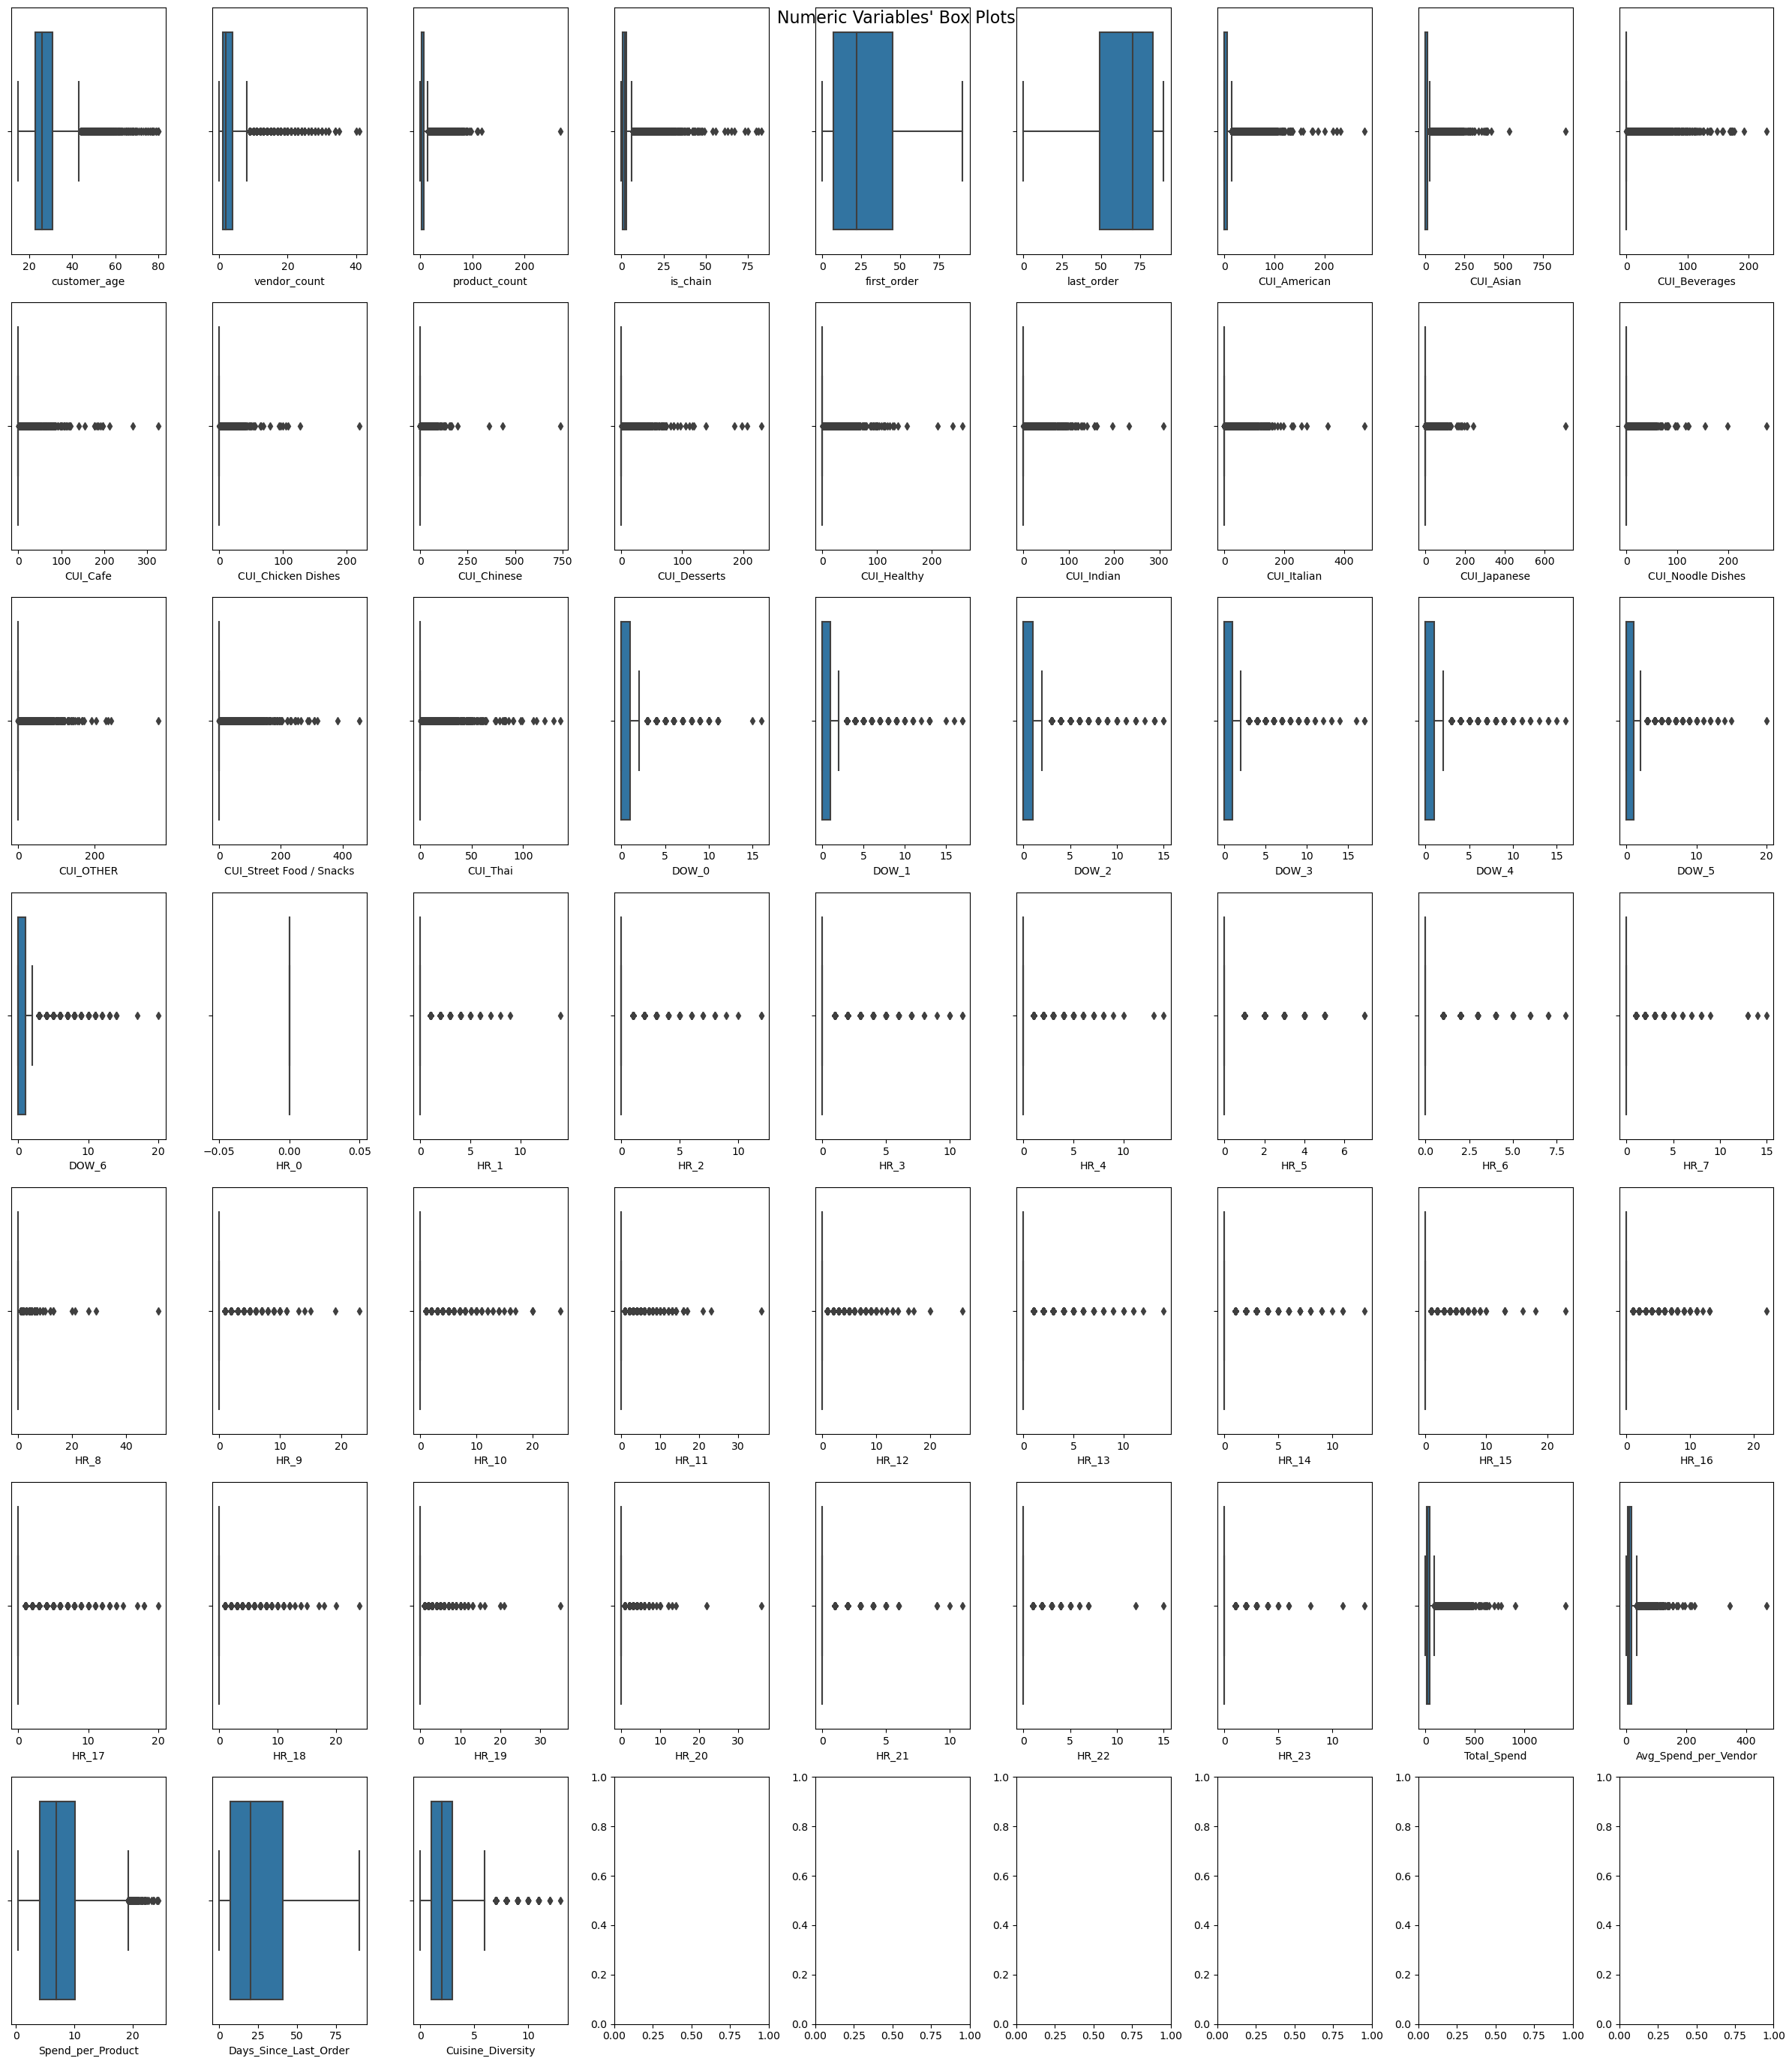

In [27]:
# Dimension of the figure
sp_rows = 7
sp_cols = ceil(len(metric_features) / sp_rows)

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(24, 28), 
                         tight_layout=True
                        )

# Plot data: Iterate across axes and associate each histogram
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=df[feat], ax=ax)

# Layout: Add a centered title to the figure
title = "Numeric Variables' Box Plots"
plt.suptitle(title, fontsize=16)

# Create directory if it doesn't exist
if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    os.makedirs(os.path.join('..', 'figures', 'eda'))

# Save the figure with a higher dpi for clarity
plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_boxplots.png'), dpi=200)

# Show the plot
plt.show()


# Bivariate Analysis

## Pairwise Relationship of Numerical Variables

### Scatter Plots

In [ ]:
variables = metric_features

import seaborn as sns

# Create pair plots for all variables
sns.pairplot(df[variables], height=2)
plt.savefig(os.path.join('..', 'figures', 'eda', 'pairplot_all_variables.png'), dpi=200)
plt.show()

* Cuisine-related columns, can be analyzed by calculating total spending per cuisine to determine preferences:

<Axes: title={'center': 'Total Spending by Cuisine'}>

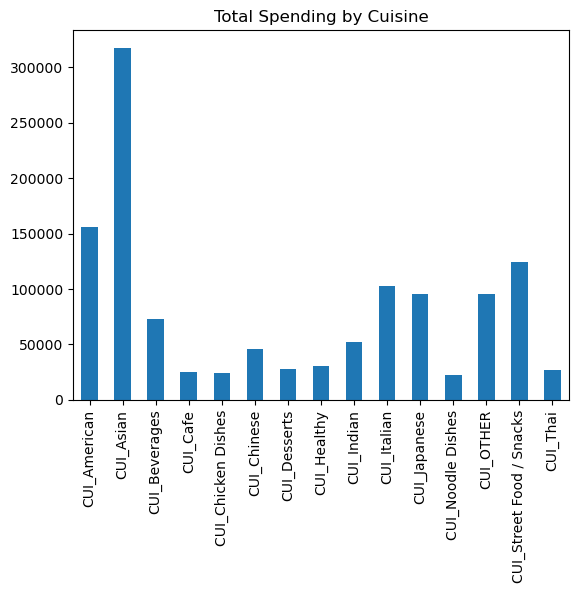

In [11]:
cuisine_columns = [col for col in df.columns if col.startswith('CUI_')]
df[cuisine_columns].sum().plot(kind='bar', title='Total Spending by Cuisine')

### Visualize Data Distribution

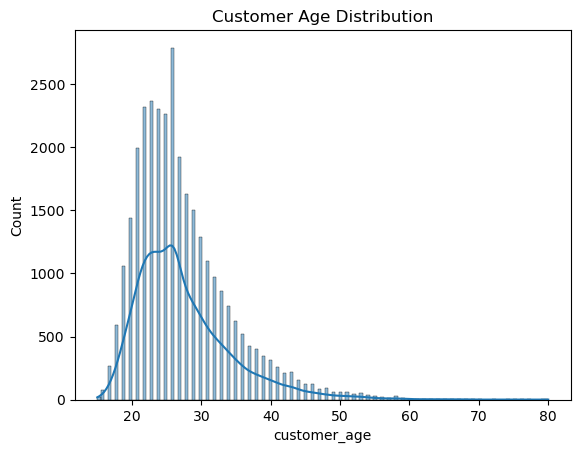

In [12]:
sns.histplot(df['customer_age'], kde=True)
plt.title('Customer Age Distribution')
plt.show()


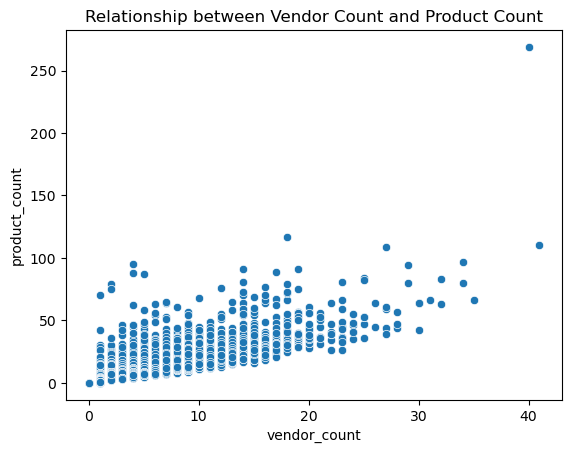

In [13]:
sns.scatterplot(x='vendor_count', y='product_count', data=df)
plt.title('Relationship between Vendor Count and Product Count')
plt.show()

### Exploring Day / Hour Order Patterns
* Day of The Week (number of orders per day of the week):

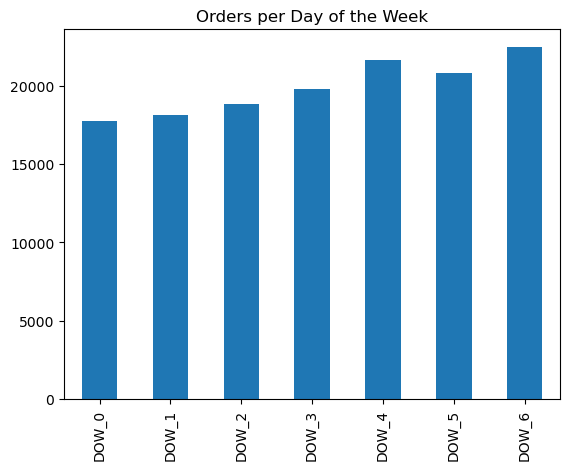

In [14]:
dow_columns = ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']
df[dow_columns].sum().plot(kind='bar', title='Orders per Day of the Week')
plt.show()

* Hour of The Day Analysis:

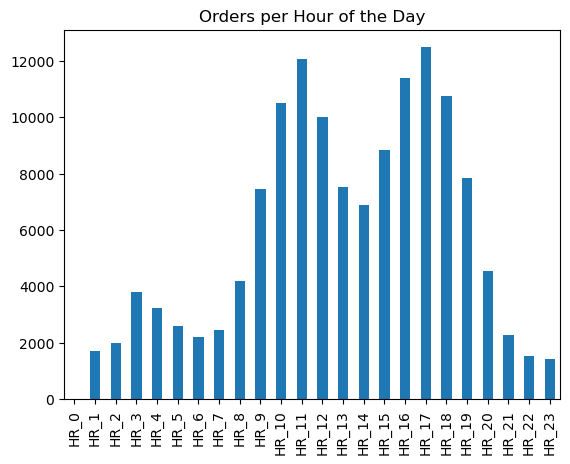

In [15]:
hr_columns = [f'HR_{i}' for i in range(24)]
df[hr_columns].sum().plot(kind='bar', title='Orders per Hour of the Day')
plt.show()


### Correlation Analysis
* Exploring relationship between numerical features:

In [16]:
# Replace any placeholders like '-' with NaN
df.replace('-', np.nan, inplace=True)

In [17]:
numeric_df = df.select_dtypes(include=[np.number])

In [18]:
numeric_df.fillna(numeric_df.median(), inplace=True)

#### Metric Variables' Correlation Matrix

In [ ]:
df_filtered = df[variables]

corr = df_filtered.corr()
annot = corr.round(2).astype(str) 

# Prepare figure
fig = plt.figure(figsize=(15, 15))

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, 
            annot=annot,  # Specify custom annotation
            fmt='s',  # The annotation matrix now has strings, so we need to explicitly say this
            
            ########## 
            vmin=-1, vmax=1, center=0, 
            ########## 
            square=True, linewidths=.5,  
            ########## 3c.
            cmap='coolwarm' 
           )

plt.savefig(os.path.join('..', 'figures', 'eda', 'correlation_matrix.png'), dpi=200)

plt.show()